# API Data Report
## Madison Zellers
### 10/11/2024
hypothesis: songs with positive sentiments have higher streaming numbers then songs with negative sentiments.

To test this hypothesis, I will be using the same artist and picking the audio features endpoints from two of their albums, their most positive album and their most negative album and will be comparing their valence, danceability, energy, tempo, and their popularity. I am specifically targeting these features in the audio features because valence, danceability, energy, and tempo can all attribute to the overall tone of the song and whether it is more positive or negative and then having it compared to the popularity score. Track numbers will also be showed because track orders may influence popularity as songs in the beginning of an album typically have more streaming numbers. I decided to pick Taylor Swift because she is very popular and from my perspective she has never had one album that is obviously more popular then the rest. 

I am interested to see if my hypothesis is correct because I am predicting that postive songs would be more popular because it can be an escape for people and I am assuming that most people would rather want to be happy or positive so they would turn to positive music. On the other hand, negative music may be more popular because people want to find songs that express emotions they are experiencing and do not want to feel alone in their negative emotions, especially with poor mental health continuing to be a rising issue. In my experience, for the longest time, I primarily listened to sad songs and people thought I was sort of weird or did not understand why I preferred more gloomier music. I would say my taste is more mixed now, but I still have an attachment to more emotional and or/negative music. I have come to the conclusion that Taylor Swift's most positive album is Lover and her most negative album is The Tortured Poets Department. 

Picking these albums may be a risky choice because many factors outside of positive and negative sentiments of the albums could account into why one album is more popular then another. Lover has been out for longer, but The Tortured Poets Department is her latest album and arguably she is more popular now when she released her latest album then when she came out with Lover.

Limits or possible unrealability of this data is that this data is only from Spotify and does not take into account music videos or other streaming services. So with this data you can not make conclusions about the popularity of different types of music as a whole, just music streamed on Spotify. Also the endpoints I am using do not show exact streaming numbers and just shows popularity from a scale of 1 to 100.  Also the popularity data is not a complete historical view of a track's popularity and is instead based on a shorter timeframe. Because of this sometimes, for example, the song listed as an aritist's number one song can have less plays then the artists's number two song.

In [2]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

These next couple cells of code is getting access to Spotify's API data. For this I need information on the session ID and session key 

In [3]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url,
                            data = data,
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

This text file shows information such as the session ID and key

In [4]:
keys = pd.read_csv('/Users/madisonzellers/emat-data/keys.txt')

In [5]:
# keys

In [6]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [7]:
# access_token

In [8]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [9]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [10]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

This is where I go to Spotify, find the album and use part of the album url as my endpoints

In [11]:
lover_album_id = "1NAmidJlEaVgA3MpcPFYGq"
ttpd_album_id = "5H7ixXZfsNMGbIE5OBSpcb"

In [12]:
ab_tracks_ep.format(lover_album_id)

'https://api.spotify.com/v1/albums/1NAmidJlEaVgA3MpcPFYGq/tracks'

Next is where I get the response and preparation to make my table

In [13]:
lover_album_response = api_call(ab_tracks_ep.format(lover_album_id), session_header)
ttpd_album_response = api_call(ab_tracks_ep.format(ttpd_album_id), session_header)

200
200


In [14]:
lover_album_df = pd.DataFrame(lover_album_response['items'])
ttpd_album_df= pd.DataFrame(ttpd_album_response['items'])
# lover_album_df.head()

In [15]:
lover_track_ids = ','.join(lover_album_df['id'].to_list())
ttpd_track_ids = ','.join(ttpd_album_df['id'].to_list())

In [16]:
t_features_ep + '?ids={}'.format(lover_track_ids)

'https://api.spotify.com/v1/audio-features?ids=43rA71bccXFGD4C8GOpIlN,1BxfuPKGuaTgP7aM0Bbdwr,1dGr1c8CrMLDpV6mPbImSI,3RauEVgRgj1IuWdJ9fDs70,3pHkh7d0lzM2AldUtz2x37,2YWtcWi3a83pdEg3Gif4Pd,214nt20w5wOxJnY462klLw,4y5bvROuBDPr5fuwXbIBZR,12M5uqx0ZuwkpLp5rJim1a,2dgFqt3w9xIQRjhPtwNk3D,1LLXZFeAHK9R4xUramtUKw,4AYtqFyFbX0Xkc2wtcygTr,5hQSXkFgbxjZo9uCwd11so,6RRNNciQGZEXnqk8SQ9yv5,1SymEzIT3H8UZfibCs3TYi,2Rk4JlNc2TPmZe2af99d45,1SmiQ65iSAbPto6gPFlBYm,1fzAuUVbzlhZ1lJAx9PtY6'

In [17]:
lover_track_features = api_call(t_features_ep + '?ids={}'.format(lover_track_ids), session_header)
ttpd_track_features = api_call(t_features_ep + '?ids={}'.format(ttpd_track_ids), session_header)

200
200


In [18]:
lover_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(lover_track_ids),
                             session_header)
ttpd_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ttpd_track_ids),
                             session_header)

200
200


In [19]:
lover_features_df = pd.DataFrame(lover_track_features['audio_features'])
ttpd_features_df = pd.DataFrame(ttpd_track_features['audio_features'])
#lover_features_df.head()

In [20]:
lover_tracks_df = pd.DataFrame(lover_track_info['tracks'])
ttpd_tracks_df = pd.DataFrame(ttpd_track_info['tracks'])
lover_tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,170640,False,{'isrc': 'USUG11901471'},{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,43rA71bccXFGD4C8GOpIlN,False,True,I Forgot That You Existed,68,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,178426,False,{'isrc': 'USUG11901472'},{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,1BxfuPKGuaTgP7aM0Bbdwr,False,True,Cruel Summer,89,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,221306,False,{'isrc': 'USUG11901473'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,1dGr1c8CrMLDpV6mPbImSI,False,True,Lover,84,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,190360,False,{'isrc': 'USUG11901474'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,3RauEVgRgj1IuWdJ9fDs70,False,True,The Man,79,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,211240,False,{'isrc': 'USUG11901475'},{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,3pHkh7d0lzM2AldUtz2x37,False,True,The Archer,73,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37


Above is the Lover tracks and the track features and now I am merging the track data with the audio features data for Lover

In [21]:
lover_merged = pd.merge(lover_features_df, lover_tracks_df, how = 'inner', on = 'id')
lover_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.664,0.316,5,-10.345,1,0.5190,0.2980,0.000002,0.0812,0.541,...,{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,False,True,I Forgot That You Existed,68,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN
1,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,...,{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,False,True,Cruel Summer,89,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
2,0.359,0.543,7,-7.582,1,0.0919,0.4920,0.000016,0.1180,0.453,...,{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,False,True,Lover,84,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI
3,0.777,0.658,0,-5.191,1,0.0540,0.0767,0.000000,0.0901,0.633,...,{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,False,True,The Man,79,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70
4,0.292,0.574,0,-9.375,1,0.0401,0.1200,0.005690,0.0663,0.166,...,{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,False,True,The Archer,73,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37


Here I do the the same for The Tortured Poets Department tracks and audio featues to be merged and am showing a list of the columns in the index so I know what colums I want to drop later.

In [22]:
ttpd_merged = pd.merge(ttpd_features_df, ttpd_tracks_df, how = 'inner', on = 'id')
lover_merged['albums'] = "Lover"
ttpd_merged['albums'] = "The Tortured Poets Department: The Anthology"
lover_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'albums'],
      dtype='object')

Here I am dropping the irrelevant columns of information for both albums.

In [23]:
lover_drop = lover_merged.drop(columns = ['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable','type_y', 'uri_y','type_x','id','uri_x','track_href', 'analysis_url', 'duration_ms_x', 'time_signature','album','artists','disc_number', 'duration_ms_y','explicit','liveness'])


In [24]:
ttpd_drop = ttpd_merged.drop(columns = ['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable','type_y', 'uri_y','type_x','id','uri_x','track_href', 'analysis_url', 'duration_ms_x', 'time_signature','album','artists','disc_number', 'duration_ms_y','explicit', 'liveness'])


Here is where I am able to compare the data from both albums together in one table.

In [25]:
album_compare = pd.concat([lover_drop,ttpd_drop], axis = 0)
album_compare

,danceability,energy,valence,tempo,name,popularity,preview_url,track_number,albums
0,0.664,0.316,0.541,92.875,I Forgot That You Existed,68,None,1,Lover
1,0.552,0.702,0.564,169.994,Cruel Summer,89,None,2,Lover
2,0.359,0.543,0.453,68.534,Lover,84,None,3,Lover
3,0.777,0.658,0.633,110.048,The Man,79,None,4,Lover
4,0.292,0.574,0.166,124.344,The Archer,73,None,5,Lover
5,0.897,0.366,0.416,100.003,I Think He Knows,69,None,6,Lover
6,0.662,0.747,0.487,150.088,Miss Americana & The Heartbreak Prince,75,None,7,Lover
7,0.811,0.719,0.865,103.979,Paper Rings,75,None,8,Lover
8,0.824,0.624,0.248,102.012,Cornelia Street,72,None,9,Lover
9,0.712,0.732,0.313,94.071,Death By A Thousand Cuts,70,None,10,Lover


Based on this table, besides on a couple outliers in Lover being in the eighties, ninties, and sixties, the majority of songs in both albums have similar popularities with tracks from both albums falling in the seventies. I calculated the average population score for both albums and got 66 for Lover and 74 for The Tortured Poets Department, but Lover has more outliers and The Tortured Poets Department has more consistency in their popularity scores. You can tell the valence score drops when you go from Lover to The Tortured Poets department which proves that I was correct that Lover has more positive sentiments. So based on the collective popularities score, you can not say that my hypothesis is true, but I believe you can still pick up on different patterns that could help my hypothesis not sound completely bogus. The three most popular tracks are on Lover. The songs with the lowest amount of energy like It's Nice To Have A Friend, Soon You'll Get Better, and I Forgot That You Existed are the least popular songs of that album. Though energy and positiveness are not synonymous, usually songs with more energy can be commmunicated as a more positive song to get you feeling energized, motivated, and positive. With danceability and tempo, I did not pick up on any patterns as there was too much variation across the board for all tracks which I found interesting.

Another approach I could have taken on this is first made sure and proved that Lover and The Tortured Poets Department is the most positive and most negative album. I could have compared all of Taylor Swift's albums and compared their valence to confirm my choices. I could have approached this in a way where I could have done two albums from different artists and used one of the most popular albums currently with a positive tone and the most popular negative tone album right now and compared popularity scores then so historical data could have not been as much of an issue.

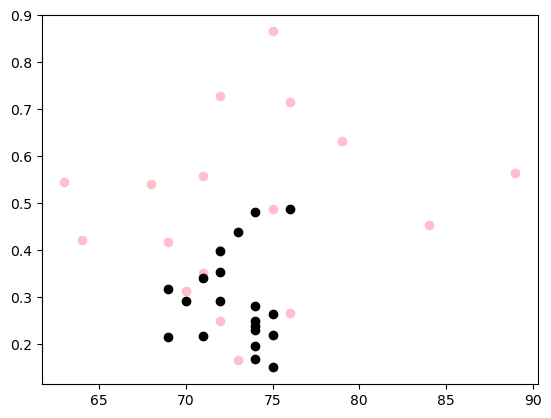

In [26]:
fig1, ax1 = plt.subplots()
ax1.scatter(lover_drop['popularity'], lover_drop['valence'],color = 'pink')
ax1.scatter(ttpd_drop['popularity'], ttpd_drop['valence'], color = 'black')
plt.show()

Now I am doing further analyses using scatter plots and regressions. The scatter plot above is popularity as the x-axis and the y-axis is valence. I used coding this graph as a start on eventually making graphs of all six different features that were focused on. Each dot represents a different track on the album

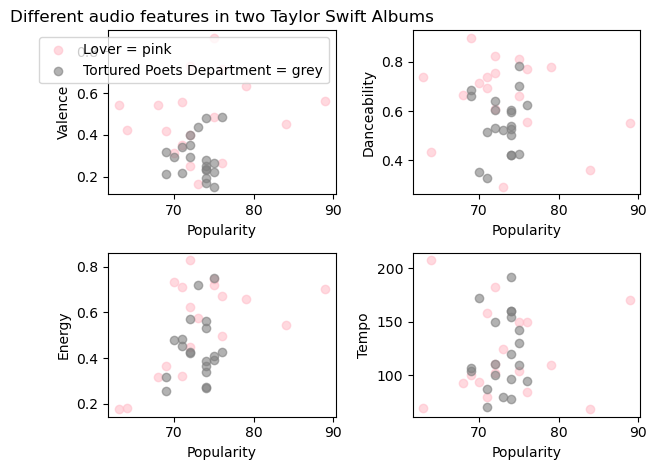

In [33]:
fig1, ax1 = plt.subplots(2,2)
ax1[0,0].scatter(lover_drop['popularity'], lover_drop['valence'],color = 'pink', alpha =.6)
ax1[0,0].scatter(ttpd_drop['popularity'], ttpd_drop['valence'], color = 'grey', alpha = .6)
ax1[0,1].scatter(lover_drop['popularity'], lover_drop['danceability'],color = 'pink', alpha =.6)
ax1[0,1].scatter(ttpd_drop['popularity'], ttpd_drop['danceability'], color = 'grey', alpha =.6)
ax1[1,0].scatter(lover_drop['popularity'], lover_drop['energy'],color = 'pink', alpha =.6)
ax1[1,0].scatter(ttpd_drop['popularity'], ttpd_drop['energy'], color = 'grey', alpha =.6)
ax1[1,1].scatter(lover_drop['popularity'], lover_drop['tempo'],color = 'pink', alpha =.6)
ax1[1,1].scatter(ttpd_drop['popularity'], ttpd_drop['tempo'], color = 'grey', alpha =.6)
ax1[0,0].legend(['Lover = pink', 'Tortured Poets Department = grey'])
ax1[0,0].set_xlabel('Popularity')
ax1[0,0].set_ylabel('Valence')
ax1[0,1].set_xlabel('Popularity')
ax1[0,1].set_ylabel('Danceability')
ax1[1,0].set_xlabel('Popularity')
ax1[1,0].set_ylabel('Energy')
ax1[1,1].set_xlabel('Popularity')
ax1[1,1].set_ylabel('Tempo')
ax1[0,0].set_title('Different audio features in two Taylor Swift Albums')
plt.tight_layout()
plt.show()

Seeing these scatter plots and being able to get a better idea of the data just further proves that there really is not a whole lot of correlation between popularity and these features that factor into the overall tone of being either positive or negative. There are some tracks that reflect my original hypothesis that tracks with less of these features do more poorly, and some tracks that ended up being the opposite where I predicted it would be.  A lot of the tracks are all over the place, but there is good amount of overlap, so you could make patterns or predictions about possible popularity based on the different audio feature choices made, but I definitely would not solely rely on this information to make decisions 

In [28]:
fit1 = smf.ols('valence ~ popularity', data = lover_drop).fit()

I am now presenting a regression for the valence and popularity of both albums to gain more specific numerical info on the correlation of the two factors. I picked to only use valence and not the other audio features because valence is the audio feature that is most synonymous with positive/negative sentiments in the songs

In [29]:
fit1

In [30]:
fit1.summary()

/opt/anaconda3/envs/data_fa24/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.4657
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.505
Time:                        19:38:38   Log-Likelihood:                 5.8391
No. Observations:                  18   AIC:                            -7.678
Df Residuals:                      16   BIC:                            -5.898
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1255      0.523      0.240      0.813      -0.984       1.235
popularity     0.0049      0.007      0.682      0.505      -0.010       0.020
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.333
Skew:                           0.239   Prob(JB):                        0.846
Kurtosis:                       2.535   Cond. No.                         880.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
fit2 = smf.ols('valence ~ popularity', data = ttpd_drop).fit()

In [32]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                 0.0001943
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.989
Time:                        19:38:38   Log-Likelihood:                 18.489
No. Observations:                  20   AIC:                            -32.98
Df Residuals:                      18   BIC:                            -30.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3027      0.826      0.366      0.718      -1.433       2.038
popularity    -0.0002      0.011     -0.014      0.989      -0.024       0.024
==============================================================================
Omnibus:                        2.122   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.731
Skew:                           0.673   Prob(JB):                        0.421
Kurtosis:                       2.488   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the r-squared and how low the number is just further shows that there is a very weak correlation for both albums. After reviewing my hypothesis, I was not able to prove it to be true. A different approach that I could have taken was focusing more on energy and how energy of a song influences its popularity as it was the audio feature that seemed most associated with changes in popularity. There are also so many factors that go into why a song and/or album is popular and I think seeing this data just further proves that idea more. Not only does the production and audio features contribute to a song, but the songwriting as well, so I think it would be interesting to delve more into the songwriting aspect of what makes a song/album popular.
